## <Is this autumn really weird?>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

# from statsmodels.tsa.stattools import adfuller

In [23]:
M=91
N=11

In [24]:
# Initialize
def init(df):
    df["Date"]=df["Date"].str.strip()
    df["Date"]=pd.to_datetime(df["Date"])
    df["Year"]=df["Date"].dt.year
    df["Month"]=df["Date"].dt.month
    df["Day"]=df["Date"].dt.day
    # Diff
    for i in range(1, len(df)):
        df.loc[i, "Diff"]=df.loc[i, "Avg"]-df.loc[i-1, "Avg"]

#### Data Preprocessing

In [25]:
df_2012=pd.read_csv("2012년 가을 기온.csv")
# print(df_2012)
init(df_2012)
print(df_2012)

         Date   Avg   Low  High  Year  Month  Day  Diff
0  2012-09-01  25.2  22.3  29.4  2012      9    1   NaN
1  2012-09-02  25.0  20.8  29.5  2012      9    2  -0.2
2  2012-09-03  24.9  22.2  28.5  2012      9    3  -0.1
3  2012-09-04  22.0  19.7  24.4  2012      9    4  -2.9
4  2012-09-05  22.3  19.2  26.1  2012      9    5   0.3
..        ...   ...   ...   ...   ...    ...  ...   ...
86 2012-11-26   2.3  -1.2   5.1  2012     11   26  -1.1
87 2012-11-27   2.1  -2.8   6.5  2012     11   27  -0.2
88 2012-11-28   5.0  -0.1  10.2  2012     11   28   2.9
89 2012-11-29   0.8  -1.9   4.7  2012     11   29  -4.2
90 2012-11-30   1.7  -3.0   6.2  2012     11   30   0.9

[91 rows x 8 columns]


In [26]:
df_2013=pd.read_csv("2013년 가을 기온.csv")
init(df_2013)

df_2014=pd.read_csv("2014년 가을 기온.csv")
init(df_2014)

df_2015=pd.read_csv("2015년 가을 기온.csv")
init(df_2015)

df_2016=pd.read_csv("2016년 가을 기온.csv")
init(df_2016)

df_2017=pd.read_csv("2017년 가을 기온.csv")
init(df_2017)

df_2018=pd.read_csv("2018년 가을 기온.csv")
init(df_2018)

df_2019=pd.read_csv("2019년 가을 기온.csv")
init(df_2019)

df_2020=pd.read_csv("2020년 가을 기온.csv")
init(df_2020)

df_2021=pd.read_csv("2021년 가을 기온.csv")
init(df_2021)

df_2022=pd.read_csv("2022년 가을 기온.csv")
init(df_2022)

df_2023=pd.read_csv("2023년 가을 기온.csv")
init(df_2023)

In [27]:
df=pd.concat([df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022])
print(df)
df=df.reset_index(drop=True)
print(df)

         Date   Avg   Low  High  Year  Month  Day  Diff
0  2012-09-01  25.2  22.3  29.4  2012      9    1   NaN
1  2012-09-02  25.0  20.8  29.5  2012      9    2  -0.2
2  2012-09-03  24.9  22.2  28.5  2012      9    3  -0.1
3  2012-09-04  22.0  19.7  24.4  2012      9    4  -2.9
4  2012-09-05  22.3  19.2  26.1  2012      9    5   0.3
..        ...   ...   ...   ...   ...    ...  ...   ...
86 2022-11-26   6.7   1.0  12.9  2022     11   26  -5.6
87 2022-11-27   5.4  -1.1  11.5  2022     11   27  -1.3
88 2022-11-28  12.3   7.5  15.0  2022     11   28   6.9
89 2022-11-29   6.9  -1.6  15.0  2022     11   29  -5.4
90 2022-11-30  -5.4  -8.1  -1.6  2022     11   30 -12.3

[1001 rows x 8 columns]
           Date   Avg   Low  High  Year  Month  Day  Diff
0    2012-09-01  25.2  22.3  29.4  2012      9    1   NaN
1    2012-09-02  25.0  20.8  29.5  2012      9    2  -0.2
2    2012-09-03  24.9  22.2  28.5  2012      9    3  -0.1
3    2012-09-04  22.0  19.7  24.4  2012      9    4  -2.9
4    2012-09-

In [28]:
# Missing value
# print(df.describe())
print(df[df["High"].isnull()])
df.loc[496, "High"]=2*df.loc[496, "Avg"]-df.loc[496, "Low"] # loc vs iloc
print(df.loc[496])

print(df_2023.describe())

          Date   Avg  Low  High  Year  Month  Day  Diff
496 2017-10-12  11.4  8.8   NaN  2017     10   12  -4.1
Date     2017-10-12 00:00:00
Avg                     11.4
Low                      8.8
High                    14.0
Year                    2017
Month                     10
Day                       12
Diff                    -4.1
Name: 496, dtype: object
                      Date        Avg        Low       High    Year  \
count                   91  91.000000  91.000000  91.000000    91.0   
mean   2023-10-16 00:00:00  15.421978  11.520879  20.052747  2023.0   
min    2023-09-01 00:00:00  -4.300000  -7.300000  -0.500000  2023.0   
25%    2023-09-23 12:00:00  10.150000   5.550000  15.600000  2023.0   
50%    2023-10-16 00:00:00  17.100000  12.900000  21.400000  2023.0   
75%    2023-11-07 12:00:00  21.550000  18.650000  25.950000  2023.0   
max    2023-11-30 00:00:00  28.500000  25.000000  32.800000  2023.0   
std                    NaN   8.096691   8.420353   7.943150    

In [29]:
# Preprocessed Data
print(df)
print(df.describe())

print(df_2023)
print(df_2023.describe())

           Date   Avg   Low  High  Year  Month  Day  Diff
0    2012-09-01  25.2  22.3  29.4  2012      9    1   NaN
1    2012-09-02  25.0  20.8  29.5  2012      9    2  -0.2
2    2012-09-03  24.9  22.2  28.5  2012      9    3  -0.1
3    2012-09-04  22.0  19.7  24.4  2012      9    4  -2.9
4    2012-09-05  22.3  19.2  26.1  2012      9    5   0.3
...         ...   ...   ...   ...   ...    ...  ...   ...
996  2022-11-26   6.7   1.0  12.9  2022     11   26  -5.6
997  2022-11-27   5.4  -1.1  11.5  2022     11   27  -1.3
998  2022-11-28  12.3   7.5  15.0  2022     11   28   6.9
999  2022-11-29   6.9  -1.6  15.0  2022     11   29  -5.4
1000 2022-11-30  -5.4  -8.1  -1.6  2022     11   30 -12.3

[1001 rows x 8 columns]
                                Date          Avg          Low         High  \
count                           1001  1001.000000  1001.000000  1001.000000   
mean   2017-10-15 21:49:05.454545408    15.003796    10.810789    19.950949   
min              2012-09-01 00:00:00    -5

#### Visualization

<Axes: ylabel='Avg'>

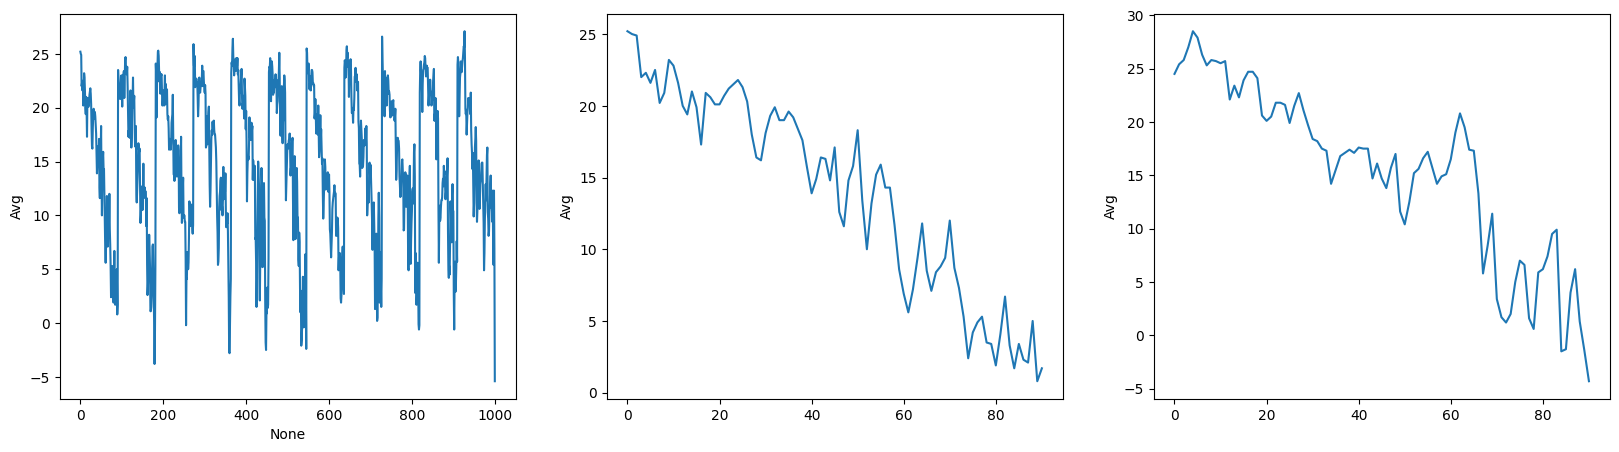

In [30]:
# Fig 1
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.lineplot(ax=ax[0], x=df.index, y=df["Avg"])
sns.lineplot(ax=ax[1], x=range(len(df_2012)), y=df_2012["Avg"])
sns.lineplot(ax=ax[2], x=range(len(df_2023)), y=df_2023["Avg"])

[23.5, 18.2, 15.000000000000002, 21.799999999999997, 17.2, 25.7, 22.8, 19.6, 26.8, 15.7, 29.4, 28.8]


<Axes: >

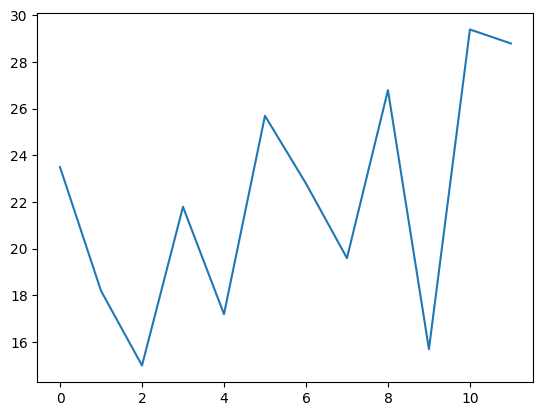

In [31]:
# Fig 2
Beginning_and_End=[]
for i in range(N):
    Beginning_and_End.append(df.loc[91*i, "Avg"]-df.loc[91*i+90, "Avg"])
Beginning_and_End.append(df_2023.loc[0, "Avg"]-df_2023.loc[90, "Avg"])
print(Beginning_and_End)
fig = plt.figure()
sns.lineplot(x=range(len(Beginning_and_End)), y=Beginning_and_End)

[[-0.25207358]] [25.3092451]
[[-0.27829272]] [27.9451505]


<Axes: xlabel='None', ylabel='Avg'>

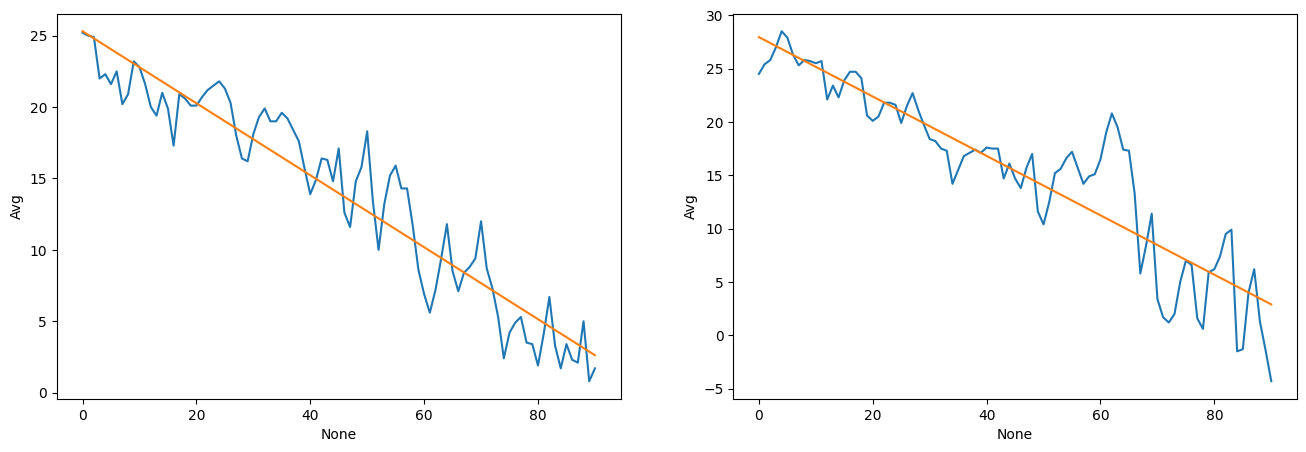

In [32]:
# Fig 2+ - Linear Regression
df_2012_copy=df_2012.copy()
day_2012=df_2012_copy.index
temperature_2012=df_2012_copy["Avg"]
day_2012=day_2012.values.reshape(-1, 1)
temperature_2012=temperature_2012.values.reshape(-1, 1)
model_Linear_Regression_2012=LinearRegression()
model_Linear_Regression_2012.fit(day_2012, temperature_2012)
print(model_Linear_Regression_2012.coef_, model_Linear_Regression_2012.intercept_)

df_2023_copy=df_2023.copy()
day_2023=df_2023_copy.index
temperature_2023=df_2023_copy["Avg"]
day_2023=day_2023.values.reshape(-1, 1)
temperature_2023=temperature_2023.values.reshape(-1, 1)
model_Linear_Regression_2023=LinearRegression()
model_Linear_Regression_2023.fit(day_2023, temperature_2023)
print(model_Linear_Regression_2023.coef_, model_Linear_Regression_2023.intercept_)

Linear_Regression_predict_2012=[]
Linear_Regression_predict_2023=[]
for i in range(M):
    Linear_Regression_predict_2012.append(model_Linear_Regression_2012.predict(day_2012)[i][0])
    Linear_Regression_predict_2023.append(model_Linear_Regression_2023.predict(day_2023)[i][0])

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(ax=ax[0], x=df_2012_copy.index, y=df_2012_copy["Avg"])
sns.lineplot(ax=ax[0], x=df_2012_copy.index, y=Linear_Regression_predict_2012)
sns.lineplot(ax=ax[1], x=df_2023_copy.index, y=df_2023_copy["Avg"])
sns.lineplot(ax=ax[1], x=df_2023_copy.index, y=Linear_Regression_predict_2023)

In [33]:
# Fig 3
print(df.mean())
print(df.groupby(["Year"]).mean())

print(df_2023.mean())

Date     2017-10-15 21:49:05.454545408
Avg                          15.003796
Low                          10.810789
High                         19.950949
Year                            2017.0
Month                             10.0
Day                           15.67033
Diff                         -0.238081
dtype: object
           Date        Avg        Low       High  Month       Day      Diff
Year                                                                       
2012 2012-10-16  13.965934  10.093407  18.356044   10.0  15.67033 -0.261111
2013 2013-10-16  14.573626  10.345055  19.301099   10.0  15.67033 -0.202222
2014 2014-10-16  15.551648  11.197802  20.736264   10.0  15.67033 -0.166667
2015 2015-10-16  15.597802  11.381319  20.684615   10.0  15.67033 -0.242222
2016 2016-10-16  15.320879  11.237363  20.280220   10.0  15.67033 -0.191111
2017 2017-10-16  14.731868  10.150549  20.073626   10.0  15.67033 -0.285556
2018 2018-10-16  14.103297   9.901099  19.261538   10.0  15.67033 

<Axes: xlabel='Avg', ylabel='Count'>

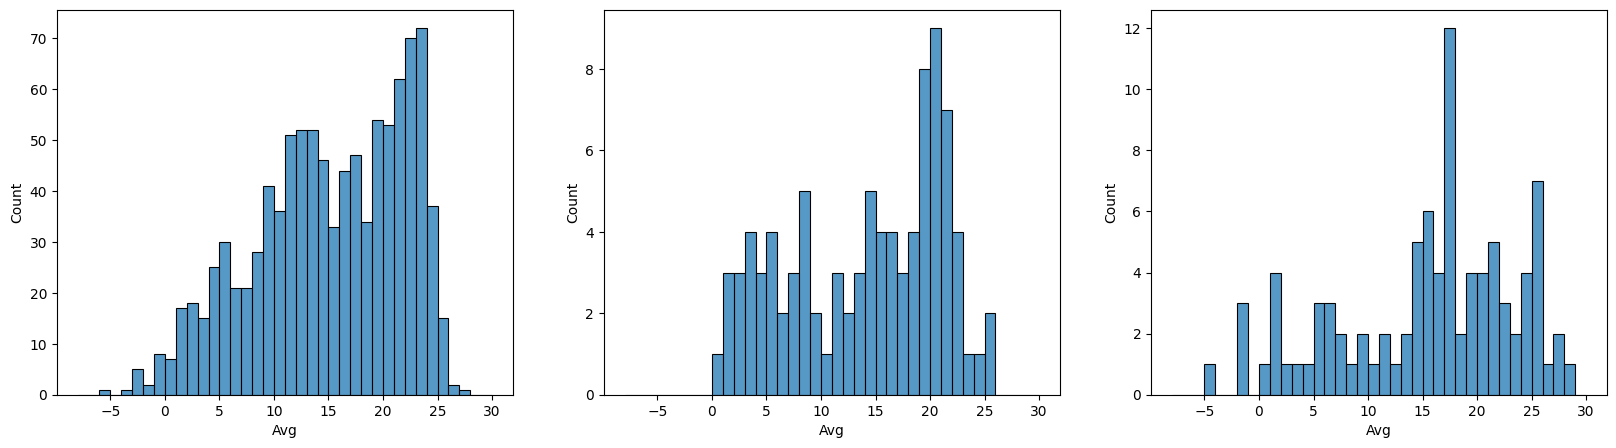

In [34]:
# Fig 4
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(ax=ax[0], data=df["Avg"], bins=list(range(-8, 31)))
sns.histplot(ax=ax[1], data=df_2012["Avg"], bins=list(range(-8, 31)))
sns.histplot(ax=ax[2], data=df_2023["Avg"], bins=list(range(-8, 31)))

<Axes: >

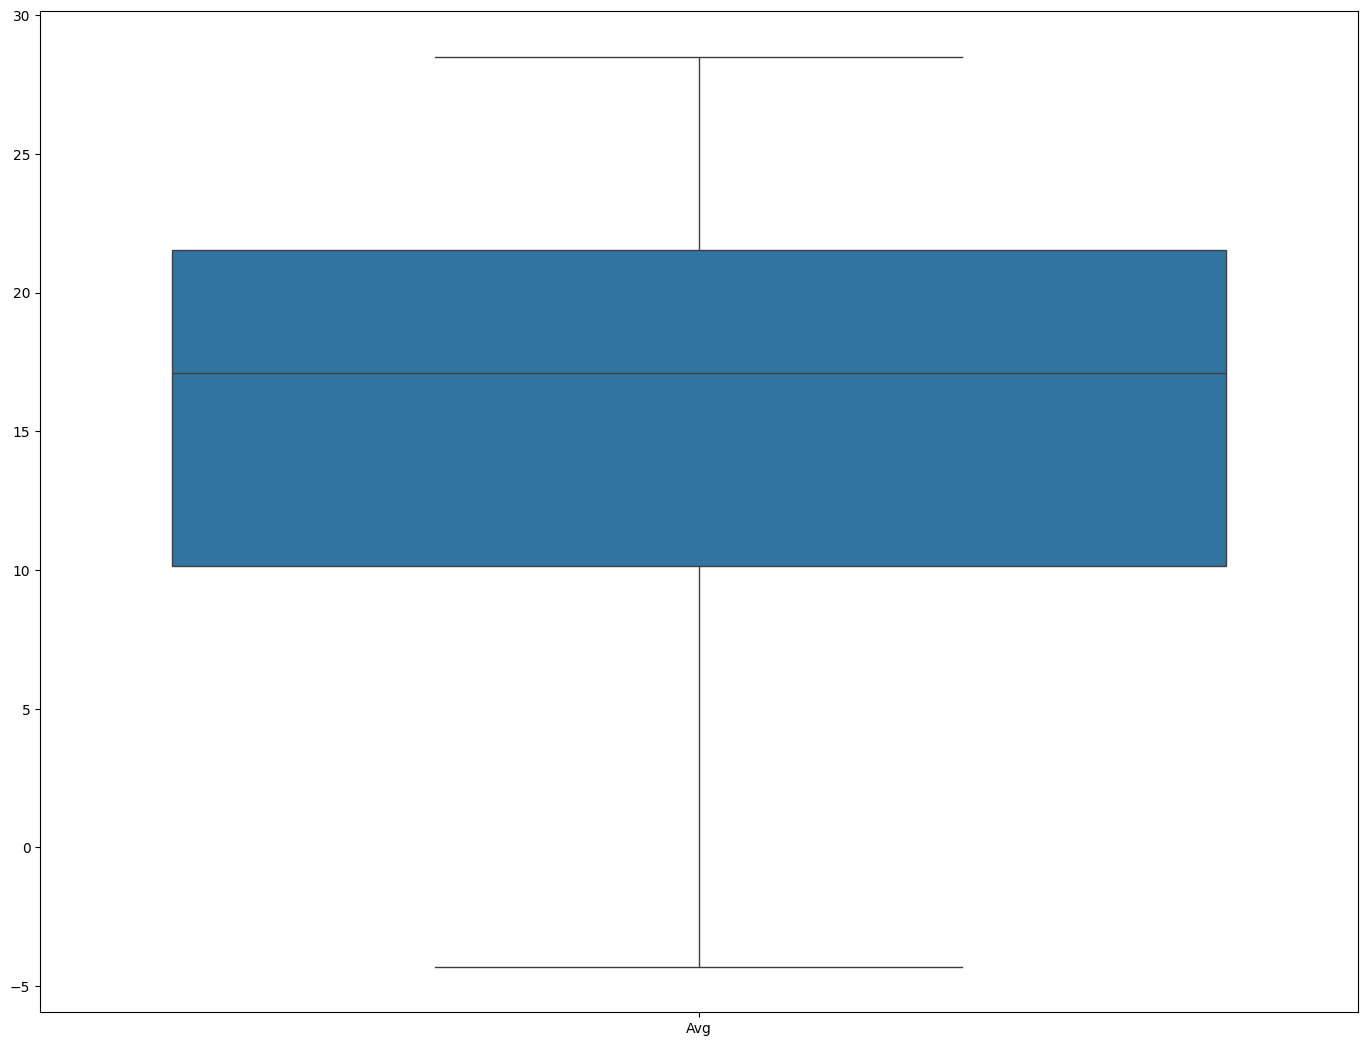

In [38]:
# Fig 5
fig = plt.figure(figsize=(17, 13))
sns.boxplot([df_2012["Avg"], df_2013["Avg"], df_2014["Avg"], df_2015["Avg"], df_2016["Avg"], df_2017["Avg"], df_2018["Avg"], df_2019["Avg"], df_2020["Avg"], df_2021["Avg"], df_2022["Avg"], df_2023["Avg"]])

6.862505779554985
6.992761650929874
8.096690712161388
45.27272727272727
38
44
12.909090909090908
11
12
5.545454545454546
3
8
3.0
0
6
1.4545454545454546
0
3


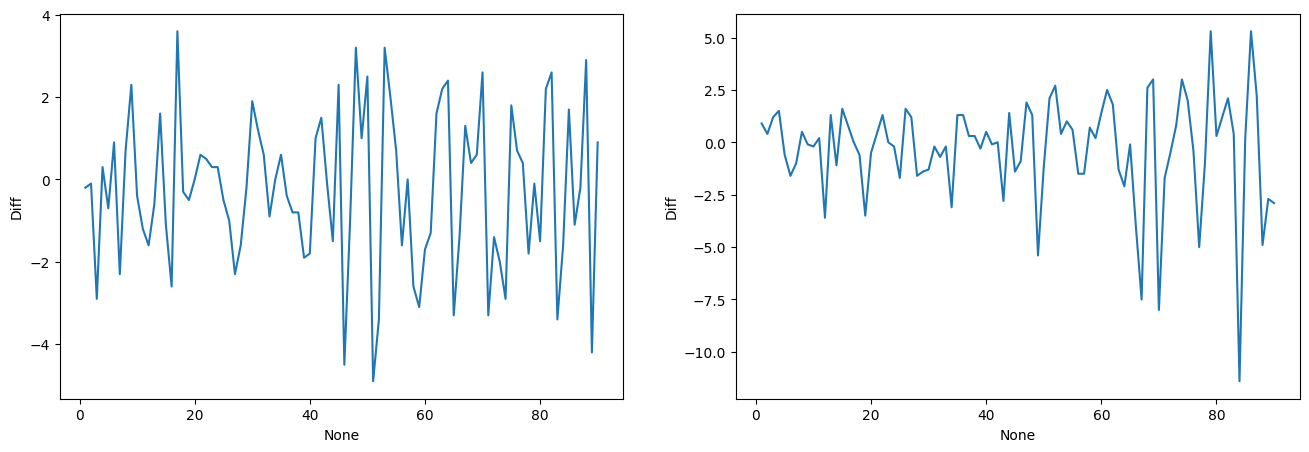

In [36]:
# Fig 6
# print(df_2012["Diff"])
# print(df_2023["Diff"])

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
sns.lineplot(ax=ax[0], x=df_2012.index, y=df_2012["Diff"])
sns.lineplot(ax=ax[1], x=df_2023.index, y=df_2023["Diff"])

print(df["Avg"].std())
print(df_2012["Avg"].std())
print(df_2023["Avg"].std())

print(len(df[df["Diff"]>0])/N)
print(len(df_2012[df_2012["Diff"]>0]))
print(len(df_2023[df_2023["Diff"]>0]))

print(len(df[abs(df["Diff"])>3])/N)
print(len(df_2012[abs(df_2012["Diff"])>3]))
print(len(df_2023[abs(df_2023["Diff"])>3]))

print(len(df[abs(df["Diff"])>4])/N)
print(len(df_2012[abs(df_2012["Diff"])>4]))
print(len(df_2023[abs(df_2023["Diff"])>4]))

print(len(df[abs(df["Diff"])>5])/N)
print(len(df_2012[abs(df_2012["Diff"])>5]))
print(len(df_2023[abs(df_2023["Diff"])>5]))

print(len(df[abs(df["Diff"])>6])/N)
print(len(df_2012[abs(df_2012["Diff"])>6]))
print(len(df_2023[abs(df_2023["Diff"])>6]))

#### Model, Prediction

In [37]:
# df=df.drop(["Date", "Year", "Month", "Day", "Low", "High", "Diff"], axis="columns")
# print(df)